<a href="https://colab.research.google.com/github/TheodorosChristou/COM616_AE2_TheodorosChristou/blob/main/Dissertation_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

169001437/169001437 [==============================] - 13s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)
Train: 50000
Test: 10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


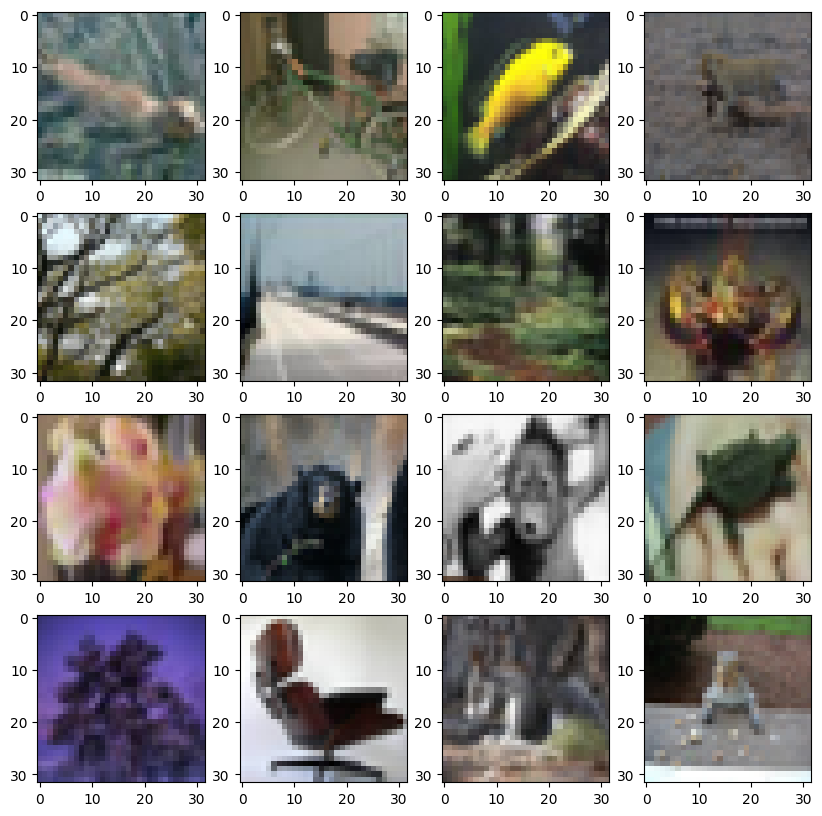

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix
from numpy import argmax
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(f"x_train shape: {train_images.shape}")
print(f"y_train shape: {train_labels.shape}")
print(f"x_test shape: {test_images.shape}")
print(f"y_test shape: {test_labels.shape}")

print(f"Train: {train_images.shape[0]}")
print(f"Test: {test_images.shape[0]}")

print(type(train_images))
print(type(train_labels))

plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 50000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(train_images[rand_num])

def training_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

def evaluation(model):
  prediction = []
  true_labels = []
  classes = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
'aquarium' ,'fish', 'ray', 'shark', 'trout',
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
'bottles', 'bowls', 'cans', 'cups', 'plates',
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe',
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
'bear', 'leopard', 'lion', 'tiger', 'wolf',
'bridge', 'castle', 'house', 'road', 'skyscraper',
'cloud', 'forest', 'mountain', 'plain', 'sea',
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
'crab', 'lobster', 'snail', 'spider', 'worm',
'baby', 'boy', 'girl', 'man', 'woman',
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
'maple', 'oak', 'palm', 'pine', 'willow',
'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

  pred = model.predict(test_images)
  print(test_labels.shape[0])
  for i in range(test_labels.shape[0]):
    prediction.append(argmax(pred[i]))
    true_labels.append(argmax(test_labels[i]))

  print(classification_report(true_labels, prediction, target_names=classes, digits=5))

X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=77)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_40 (Ba  (None, 30, 30, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_40 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_41 (Ba  (None, 13, 13, 128)      

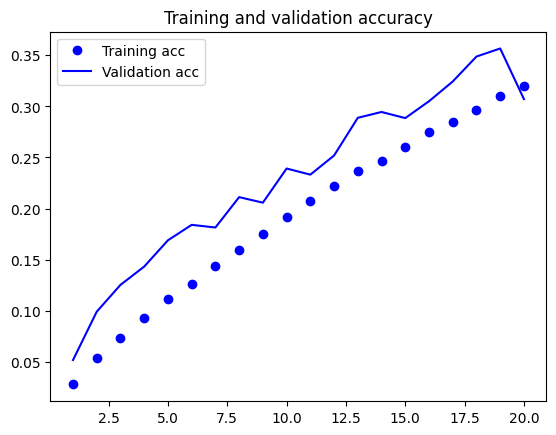

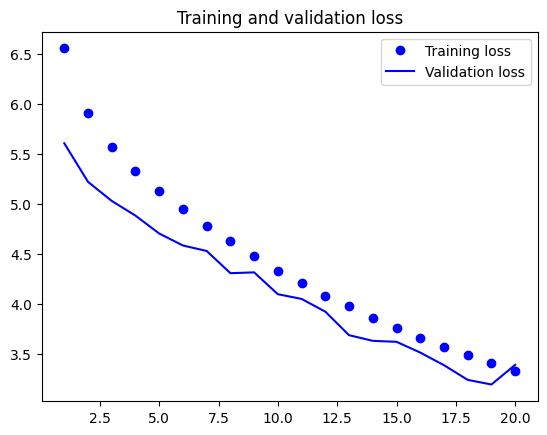

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.87234   0.41000   0.55782       100
          dolphin    0.51471   0.35000   0.41667       100
            otter    0.32000   0.24000   0.27429       100
             seal    0.30909   0.17000   0.21935       100
            whale    0.12403   0.16000   0.13974       100
         aquarium    0.38889   0.21000   0.27273       100
             fish    0.27820   0.37000   0.31760       100
              ray    0.34615   0.36000   0.35294       100
            shark    0.22358   0.55000   0.31792       100
            trout    0.79310   0.23000   0.35659       100
          orchids    0.23913   0.11000   0.15068       100
          poppies    0.43750   0.14000   0.21212       100
            roses    0.42373   0.25000   0.31447       100
       sunflowers    0.45000   0.18000   0.25714       100
           tulips    0.28205   0.11000   0.15827     

In [ ]:
def CNN():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

CNN = CNN()


from tensorflow.keras import optimizers
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
CNN.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

CNN.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = CNN.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(CNN)
        scores = CNN.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {CNN.metrics_names[1]} of {scores[1]*100}')
        return CNN

CNN = gpu()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_50 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_50 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_36 (Conv2D)          (None, 16, 16, 64)      

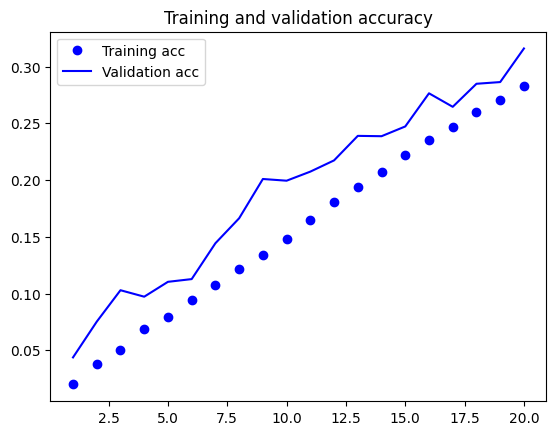

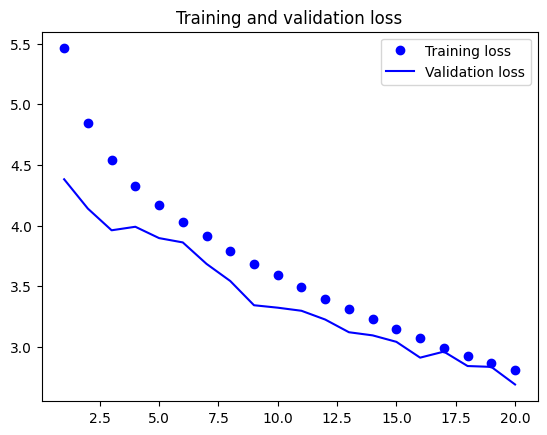

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.63107   0.65000   0.64039       100
          dolphin    0.40517   0.47000   0.43519       100
            otter    0.23256   0.20000   0.21505       100
             seal    0.13613   0.26000   0.17869       100
            whale    0.13393   0.15000   0.14151       100
         aquarium    0.27273   0.27000   0.27136       100
             fish    0.29323   0.39000   0.33476       100
              ray    0.34000   0.34000   0.34000       100
            shark    0.31667   0.38000   0.34545       100
            trout    0.60811   0.45000   0.51724       100
          orchids    0.43750   0.14000   0.21212       100
          poppies    0.26087   0.06000   0.09756       100
            roses    0.36986   0.27000   0.31214       100
       sunflowers    0.35556   0.16000   0.22069       100
           tulips    0.20635   0.13000   0.15951     

In [ ]:
def VGG():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

VGG = VGG()

optimizer = Adam(learning_rate=0.0001)
VGG.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

VGG.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = VGG.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(VGG)
        scores = VGG.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {VGG.metrics_names[1]} of {scores[1]*100}')
        return VGG

VGG = gpu()

test_loss, test_acc = VGG.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_41 (Conv2D)          (None, 32, 32, 128)          3584      ['input_1[0][0]']             
                                                                                                  
 conv2d_42 (Conv2D)          (None, 32, 32, 128)          147584    ['conv2d_41[0][0]']           
                                                                                                  
 max_pooling2d_33 (MaxPooli  (None, 16, 16, 128)          0         ['conv2d_42[0][0]']           
 ng2D)                                                                                        

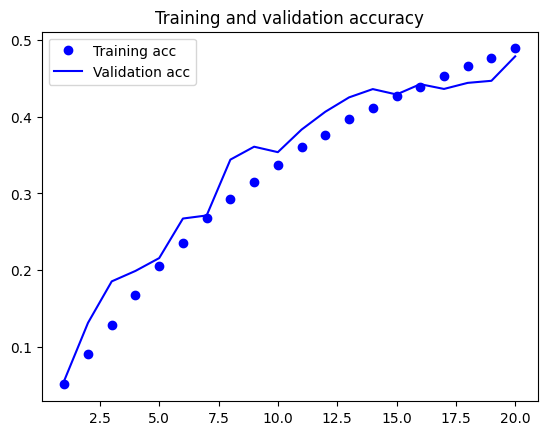

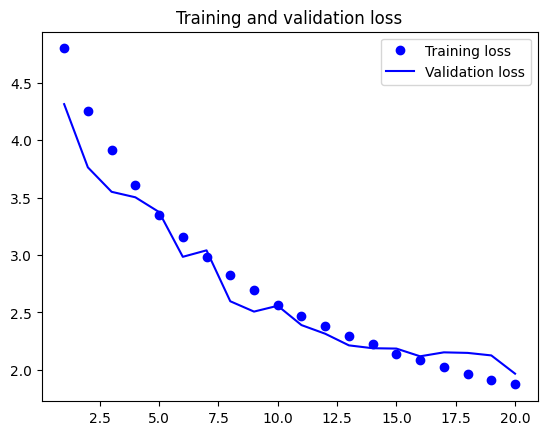

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.72449   0.71000   0.71717       100
          dolphin    0.65116   0.56000   0.60215       100
            otter    0.43836   0.32000   0.36994       100
             seal    0.24242   0.16000   0.19277       100
            whale    0.22105   0.42000   0.28966       100
         aquarium    0.39103   0.61000   0.47656       100
             fish    0.41538   0.54000   0.46957       100
              ray    0.58462   0.38000   0.46061       100
            shark    0.93750   0.45000   0.60811       100
            trout    0.45455   0.70000   0.55118       100
          orchids    0.50000   0.19000   0.27536       100
          poppies    0.44118   0.15000   0.22388       100
            roses    0.44715   0.55000   0.49327       100
       sunflowers    0.36441   0.43000   0.39450       100
           tulips    0.51562   0.33000   0.40244     

In [ ]:
def ResNet():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    for _ in range(2):
        residual = x
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.4)(x)
        x = layers.add([x, residual])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

ResNet = ResNet()

optimizer = Adam(learning_rate=0.0001)
ResNet.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

ResNet.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = ResNet.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(ResNet)
        scores = ResNet.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {ResNet.metrics_names[1]} of {scores[1]*100}')
        return ResNet

ResNet = gpu()

test_loss, test_acc = ResNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 16, 16, 64)        1792      
                                                                 
 batch_normalization_142 (B  (None, 16, 16, 64)        256       
 atchNormalization)                                              
                                                                 
 activation_83 (Activation)  (None, 16, 16, 64)        0         
                                                                 
 depthwise_conv2d_39 (Depth  (None, 16, 16, 64)        640       
 wiseConv2D)                                                     
                                                                 
 batch_normalization_143 (B  (None, 16, 16, 64)        256       
 atchNormalization)                                              
                                                     

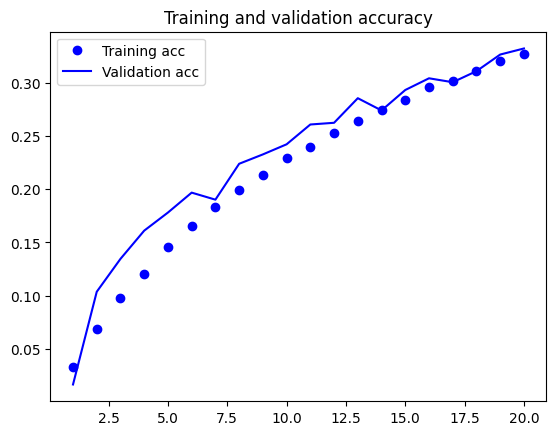

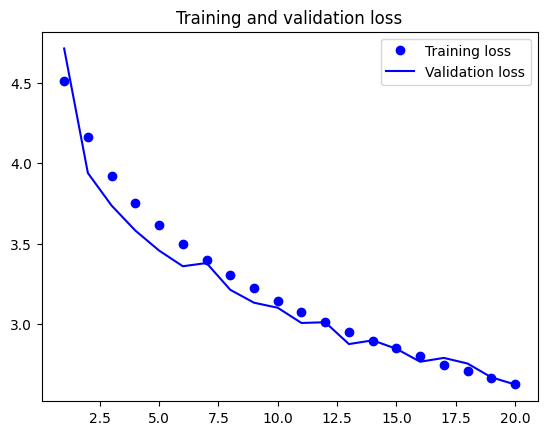

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.67045   0.59000   0.62766       100
          dolphin    0.40625   0.39000   0.39796       100
            otter    0.20611   0.27000   0.23377       100
             seal    0.19512   0.08000   0.11348       100
            whale    0.12037   0.13000   0.12500       100
         aquarium    0.21818   0.36000   0.27170       100
             fish    0.33628   0.38000   0.35681       100
              ray    0.37037   0.30000   0.33149       100
            shark    0.34058   0.47000   0.39496       100
            trout    0.42553   0.40000   0.41237       100
          orchids    0.21429   0.06000   0.09375       100
          poppies    0.29630   0.08000   0.12598       100
            roses    0.34746   0.41000   0.37615       100
       sunflowers    0.30769   0.16000   0.21053       100
           tulips    0.32203   0.19000   0.23899     

In [ ]:
import time
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D

def MobileNet():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(GlobalAveragePooling2D())

    model.add(Dropout(0.4))

    model.add(Dense(100, activation='softmax'))

    return model

MobileNet.summary()

MobileNet = build_simple_mobilenet()

optimizer = Adam(learning_rate=0.0001)
MobileNet.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


def gpu():
    with tf.device('/device:GPU:0'):


        training_start = time.time()
        history = MobileNet.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(MobileNet)
        scores = MobileNet.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {MobileNet.metrics_names[1]} of {scores[1]*100}')
        return MobileNet

MobileNet = gpu()

test_loss, test_acc = MobileNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_150 (Conv2D)         (None, 16, 16, 32)        864       
                                                                 
 batch_normalization_200 (B  (None, 16, 16, 32)        128       
 atchNormalization)                                              
                                                                 
 re_lu_25 (ReLU)             (None, 16, 16, 32)        0         
                                                                 
 conv2d_151 (Conv2D)         (None, 16, 16, 96)        3072      
                                                                 
 batch_normalization_201 (B  (None, 16, 16, 96)        384       
 atchNormalization)                                              
                                                                 
 re_lu_26 (ReLU)             (None, 16, 16, 96)      

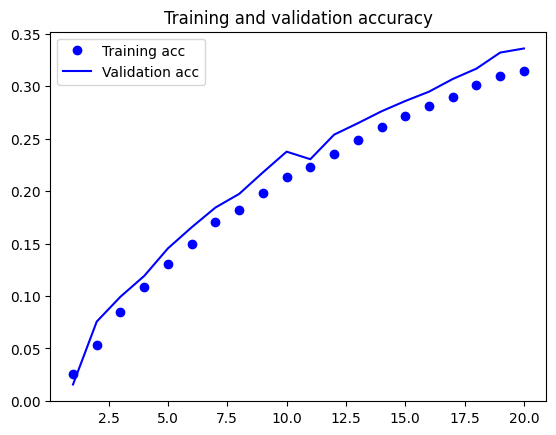

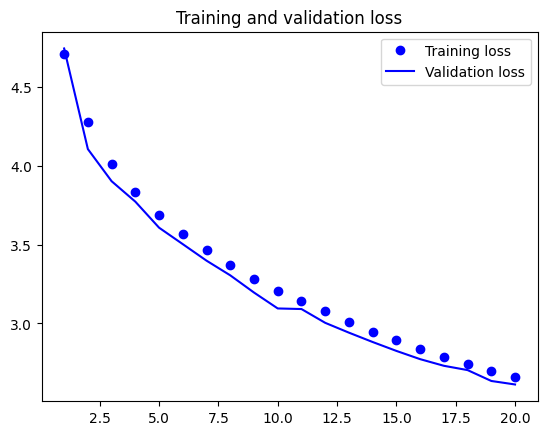

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.65169   0.58000   0.61376       100
          dolphin    0.37313   0.50000   0.42735       100
            otter    0.26667   0.20000   0.22857       100
             seal    0.22222   0.10000   0.13793       100
            whale    0.09934   0.15000   0.11952       100
         aquarium    0.21656   0.34000   0.26459       100
             fish    0.31461   0.28000   0.29630       100
              ray    0.32258   0.40000   0.35714       100
            shark    0.40000   0.40000   0.40000       100
            trout    0.58065   0.36000   0.44444       100
          orchids    0.30435   0.14000   0.19178       100
          poppies    0.34615   0.09000   0.14286       100
            roses    0.31731   0.33000   0.32353       100
       sunflowers    0.39394   0.26000   0.31325       100
           tulips    0.31429   0.11000   0.16296     

In [ ]:
import math
import time

def EfficientNet(width_coefficient=1.0, depth_coefficient=1.0, resolution_coefficient=1.0, dropout_rate=0.2):
    model = models.Sequential()

    def round_filters(filters, multiplier):
        divisor = 8
        min_depth = None
        if not multiplier:
            return filters

        filters *= multiplier
        min_depth = divisor
        new_filters = max(min_depth, int(filters + divisor / 2) // divisor * divisor)
        if new_filters < 0.9 * filters:
            new_filters += divisor
        return int(new_filters)

    def round_repeats(repeats, multiplier):
        if not multiplier:
            return repeats
        return int(math.ceil(multiplier * repeats))

    def MBConvBlock(model, input_filters, output_filters, kernel_size, strides, expand_ratio, se_ratio, id_skip, drop_connect_rate):
        expand_filters = input_filters * expand_ratio
        model.add(layers.Conv2D(expand_filters, kernel_size=1, padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.ReLU())

        model.add(layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same', use_bias=False))
        model.add(layers.BatchNormalization())
        model.add(layers.ReLU())

        if 0 < se_ratio <= 1:
            filters_se = max(1, int(input_filters * se_ratio))
            se = layers.GlobalAveragePooling2D()(model.layers[-1].output)
            se = layers.Reshape((1, 1, expand_filters))(se)
            se = layers.Conv2D(filters_se, kernel_size=1, activation='relu', padding='same')(se)
            se = layers.Conv2D(expand_filters, kernel_size=1, activation='sigmoid', padding='same')(se)
            x = layers.multiply([model.layers[-1].output, se])
        else:
            x = model.layers[-1].output

        model.add(layers.Conv2D(output_filters, kernel_size=1, padding='same', use_bias=False))
        model.add(layers.BatchNormalization())

        if id_skip and strides == 1 and input_filters == output_filters:
            if drop_connect_rate:
                model.add(layers.Dropout(drop_connect_rate))
            model.add(layers.add([model.layers[-1].output, model.layers[-7].output]))

        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(round_filters(32, width_coefficient), kernel_size=3, strides=(2, 2), padding='same', use_bias=False, input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    num_blocks = 5
    strides = [1, 2, 2, 2, 2, 1]
    kernels = [3, 3, 3, 3, 5, 5]
    filters = [16, 24, 40, 80, 112, 112]
    depth = round_repeats(1, depth_coefficient)
    drop_rate = dropout_rate / num_blocks

    for i in range(num_blocks):
        MBConvBlock(model,
                    input_filters=round_filters(filters[i], width_coefficient),
                    output_filters=round_filters(filters[i + 1], width_coefficient),
                    kernel_size=kernels[i],
                    strides=strides[i],
                    expand_ratio=6,
                    se_ratio=0.25,
                    id_skip=True,
                    drop_connect_rate=drop_rate)

    model.add(layers.Conv2D(round_filters(1280, width_coefficient), kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(100, activation='softmax'))

    return model

EfficientNet = EfficientNet()

optimizer = Adam(learning_rate=0.0001)
EfficientNet.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

EfficientNet.summary()

def gpu():
    with tf.device('/device:GPU:0'):


        training_start = time.time()
        history = EfficientNet.fit(X_train, y_train, epochs=20, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(EfficientNet)
        scores = EfficientNet.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {EfficientNet.metrics_names[1]} of {scores[1]*100}')
        return EfficientNet

EfficientNet = gpu()

test_loss, test_acc = EfficientNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_244 (B  (None, 30, 30, 64)        256       
 atchNormalization)                                              
                                                                 
 dropout_129 (Dropout)       (None, 30, 30, 64)        0         
                                                                 
 conv2d_193 (Conv2D)         (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_245 (B  (None, 28, 28, 128)       512       
 atchNormalization)                                              
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 14, 14, 128)     

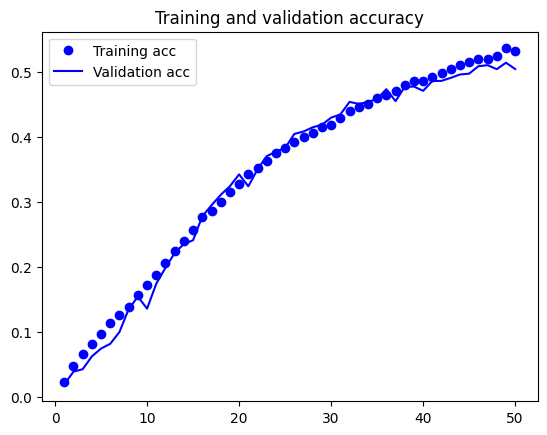

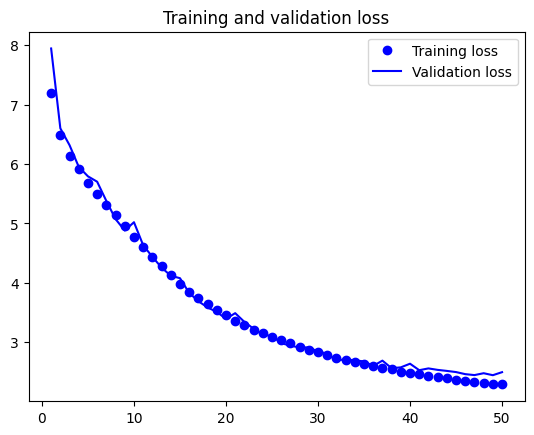

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.58278   0.88000   0.70120       100
          dolphin    0.66355   0.71000   0.68599       100
            otter    0.38710   0.48000   0.42857       100
             seal    0.18421   0.35000   0.24138       100
            whale    0.27389   0.43000   0.33463       100
         aquarium    0.47525   0.48000   0.47761       100
             fish    0.66250   0.53000   0.58889       100
              ray    0.72881   0.43000   0.54088       100
            shark    0.82609   0.57000   0.67456       100
            trout    0.64151   0.68000   0.66019       100
          orchids    0.44444   0.44000   0.44221       100
          poppies    0.34615   0.27000   0.30337       100
            roses    0.62162   0.46000   0.52874       100
       sunflowers    0.64912   0.37000   0.47134       100
           tulips    0.69388   0.34000   0.45638     

In [ ]:
def CNN2():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model



CNN2 = CNN2()

optimizer = Adam(learning_rate=0.0001)
CNN2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

CNN2.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = CNN2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(CNN2)
        scores = CNN2.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {CNN2.metrics_names[1]} of {scores[1]*100}')
        return CNN2

CNN2 = gpu()

test_loss, test_acc = CNN2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_203 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 conv2d_204 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_255 (B  (None, 32, 32, 64)        256       
 atchNormalization)                                              
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_140 (Dropout)       (None, 16, 16, 64)        0         
                                                                 
 conv2d_205 (Conv2D)         (None, 16, 16, 128)     

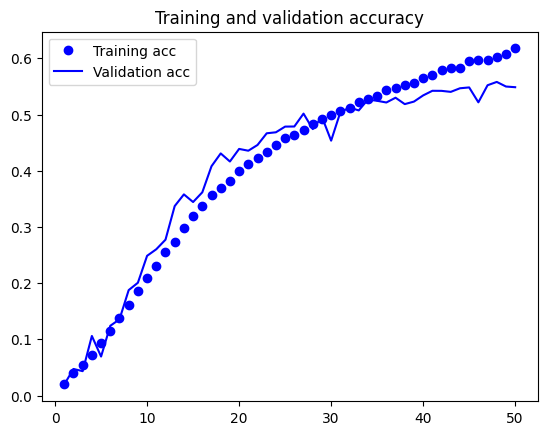

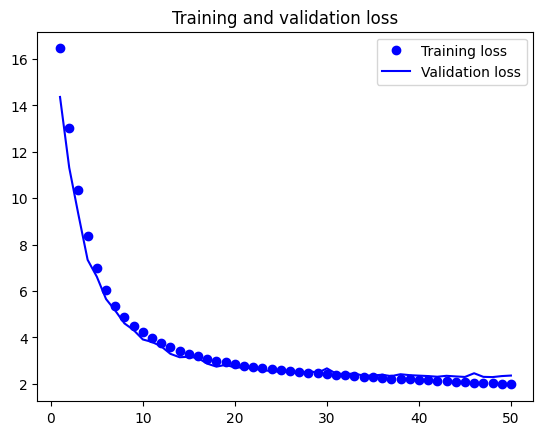

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.80412   0.78000   0.79188       100
          dolphin    0.66346   0.69000   0.67647       100
            otter    0.43243   0.48000   0.45498       100
             seal    0.33333   0.30000   0.31579       100
            whale    0.35294   0.42000   0.38356       100
         aquarium    0.60714   0.51000   0.55435       100
             fish    0.72727   0.56000   0.63277       100
              ray    0.64198   0.52000   0.57459       100
            shark    0.77907   0.67000   0.72043       100
            trout    0.80723   0.67000   0.73224       100
          orchids    0.50000   0.36000   0.41860       100
          poppies    0.34532   0.48000   0.40167       100
            roses    0.57000   0.57000   0.57000       100
       sunflowers    0.75000   0.36000   0.48649       100
           tulips    0.59091   0.39000   0.46988     

In [ ]:
def VGG2():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer='l2'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer='l2'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

VGG2 = VGG2()

optimizer = Adam(learning_rate=0.0001)
VGG2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


VGG2.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = VGG2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(VGG2)
        scores = VGG2.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {VGG2.metrics_names[1]} of {scores[1]*100}')
        return VGG2

VGG2 = gpu()

test_loss, test_acc = VGG2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

In [ ]:
def ResNet2():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))(inputs)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(12):
        residual = x
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))(x)
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.01))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

ResNet2 = ResNet2()

optimizer = Adam(learning_rate=0.0001)
ResNet2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

ResNet2.summary()

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = ResNet2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(ResNet2)
        scores = ResNet2.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {ResNet2.metrics_names[1]} of {scores[1]*100}')
        return ResNet2

ResNet2 = gpu()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 32, 32, 128)          3584      ['input_2[0][0]']             
                                                                                                  
 conv2d_15 (Conv2D)          (None, 32, 32, 128)          147584    ['conv2d_14[0][0]']           
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)          0         ['conv2d_15[0][0]']           
 g2D)                                                                                       

KeyboardInterrupt: 

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_526 (Conv2D)         (None, 16, 16, 64)        1792      
                                                                 
 batch_normalization_698 (B  (None, 16, 16, 64)        256       
 atchNormalization)                                              
                                                                 
 activation_473 (Activation  (None, 16, 16, 64)        0         
 )                                                               
                                                                 
 depthwise_conv2d_239 (Dept  (None, 16, 16, 64)        640       
 hwiseConv2D)                                                    
                                                                 
 batch_normalization_699 (B  (None, 16, 16, 64)        256       
 atchNormalization)                                  

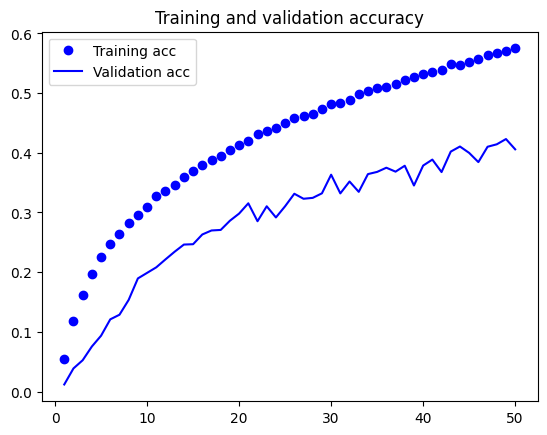

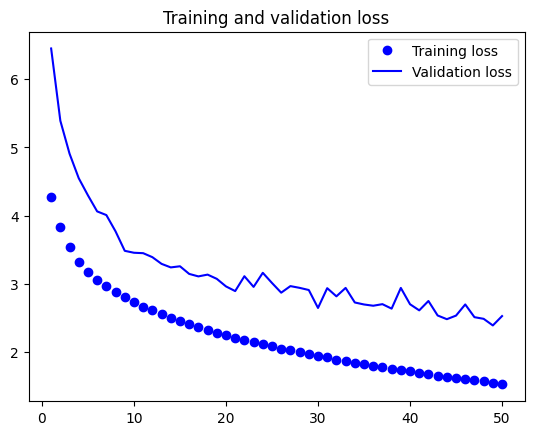

313/313 [==============================] - 1s 4ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.85263   0.81000   0.83077       100
          dolphin    0.62637   0.57000   0.59686       100
            otter    0.55556   0.30000   0.38961       100
             seal    0.25000   0.14000   0.17949       100
            whale    0.26389   0.19000   0.22093       100
         aquarium    0.57143   0.28000   0.37584       100
             fish    0.43750   0.56000   0.49123       100
              ray    0.68627   0.35000   0.46358       100
            shark    0.54412   0.37000   0.44048       100
            trout    0.56977   0.49000   0.52688       100
          orchids    0.47619   0.10000   0.16529       100
          poppies    0.51613   0.16000   0.24427       100
            roses    0.60000   0.45000   0.51429       100
       sunflowers    0.48000   0.24000   0.32000       100
           tulips    0.42857   0.03000   0.05607     

In [ ]:
import time
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D

def MobileNet2():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(GlobalAveragePooling2D())


    model.add(Dense(100, activation='softmax'))

    return model


MobileNet2 = MobileNet2()
MobileNet2.summary()

optimizer = Adam(learning_rate=0.0001)
MobileNet2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = MobileNet2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(MobileNet2)
        scores = simple_mobilenet_model.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {MobileNet2.metrics_names[1]} of {scores[1]*100}')
        return MobileNet2

MobileNet2 = gpu()

test_loss, test_acc = MobileNet2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 16, 16, 32)        864       
                                                                 
 batch_normalization_46 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                                 
 re_lu_32 (ReLU)             (None, 16, 16, 32)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 16, 144)       4608      
                                                                 
 batch_normalization_47 (Ba  (None, 16, 16, 144)       576       
 tchNormalization)                                               
                                                                 
 re_lu_33 (ReLU)             (None, 16, 16, 144)      

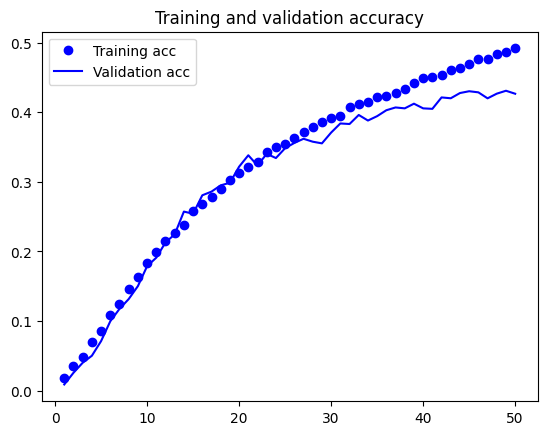

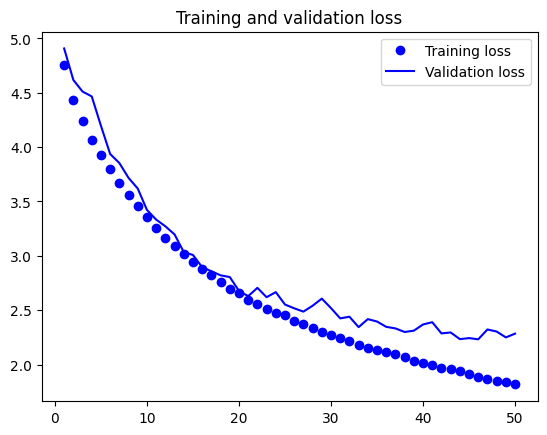

313/313 [==============================] - 2s 5ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.71845   0.74000   0.72906       100
          dolphin    0.39370   0.50000   0.44053       100
            otter    0.38462   0.30000   0.33708       100
             seal    0.31818   0.21000   0.25301       100
            whale    0.15484   0.24000   0.18824       100
         aquarium    0.44706   0.38000   0.41081       100
             fish    0.53750   0.43000   0.47778       100
              ray    0.59524   0.50000   0.54348       100
            shark    0.62637   0.57000   0.59686       100
            trout    0.70238   0.59000   0.64130       100
          orchids    0.43750   0.28000   0.34146       100
          poppies    0.42424   0.14000   0.21053       100
            roses    0.42857   0.39000   0.40838       100
       sunflowers    0.38961   0.30000   0.33898       100
           tulips    0.36842   0.14000   0.20290     

In [ ]:
import math
import time

def round_filters(filters, multiplier):
    divisor = 8
    min_depth = None
    if not multiplier:
        return filters

    filters *= multiplier
    min_depth = divisor
    new_filters = max(min_depth, int(filters + divisor / 2) // divisor * divisor)
    if new_filters < 0.9 * filters:
        new_filters += divisor
    return int(new_filters)

def round_repeats(repeats, multiplier):
    if not multiplier:
        return repeats
    return int(math.ceil(multiplier * repeats))

def MBConvBlock(model, input_filters, output_filters, kernel_size, strides, expand_ratio, se_ratio, id_skip, drop_connect_rate):
    expand_filters = input_filters * expand_ratio
    model.add(layers.Conv2D(expand_filters, kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    if 0 < se_ratio <= 1:
        filters_se = max(1, int(input_filters * se_ratio))
        se = layers.GlobalAveragePooling2D()(model.layers[-1].output)
        se = layers.Reshape((1, 1, expand_filters))(se)
        se = layers.Conv2D(filters_se, kernel_size=1, activation='relu', padding='same')(se)
        se = layers.Conv2D(expand_filters, kernel_size=1, activation='sigmoid', padding='same')(se)
        x = layers.multiply([model.layers[-1].output, se])
    else:
        x = model.layers[-1].output

    model.add(layers.Conv2D(output_filters, kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())

    if id_skip and strides == 1 and input_filters == output_filters:
        if drop_connect_rate:
            model.add(layers.Dropout(drop_connect_rate))
        model.add(layers.add([model.layers[-1].output, model.layers[-7].output]))

def EfficientNet2(width_coefficient=1.0, depth_coefficient=1.0, dropout_rate=0.2, l2_reg=1e-5):
    model = models.Sequential()

    model.add(layers.Conv2D(round_filters(32, width_coefficient), kernel_size=3, strides=(2, 2), padding='same', use_bias=False, input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    num_blocks = 8
    strides = [1, 2, 2, 2, 1, 1, 2, 1]
    kernels = [3, 3, 3, 5, 5, 5, 3, 3]
    filters = [24, 32, 48, 96, 128, 224, 384, 512]
    depth = round_repeats(1, depth_coefficient)
    drop_rate = dropout_rate / num_blocks

    for i in range(num_blocks - 1):
        MBConvBlock(model,
                    input_filters=round_filters(filters[i], width_coefficient),
                    output_filters=round_filters(filters[i + 1], width_coefficient),
                    kernel_size=kernels[i],
                    strides=strides[i],
                    expand_ratio=6,
                    se_ratio=0.25,
                    id_skip=True,
                    drop_connect_rate=drop_rate)

        model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(round_filters(1280, width_coefficient), kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(100, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg)))

    return model

EfficientNet2 = EfficientNet2()

optimizer = Adam(learning_rate=0.0001)
EfficientNet2.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

EfficientNet2.summary()

def gpu():
    with tf.device('/device:GPU:0'):


        training_start = time.time()
        history = EfficientNet2.fit(X_train, y_train, epochs=50, batch_size=64,
                                  validation_data=(X_validation, y_validation))
        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(EfficientNet2)
        scores = EfficientNet2.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {EfficientNet2.metrics_names[1]} of {scores[1]*100}')
        return EfficientNet2

EfficientNet2 = gpu()

test_loss, test_acc = EfficientNet2.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_50 (Ba  (None, 30, 30, 64)        256       
 tchNormalization)                                               
                                                                 
 dropout_50 (Dropout)        (None, 30, 30, 64)        0         
                                                                 
 conv2d_61 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_51 (Ba  (None, 28, 28, 128)       512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 128)      

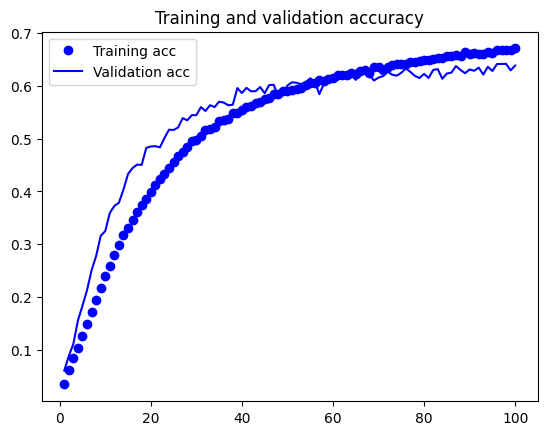

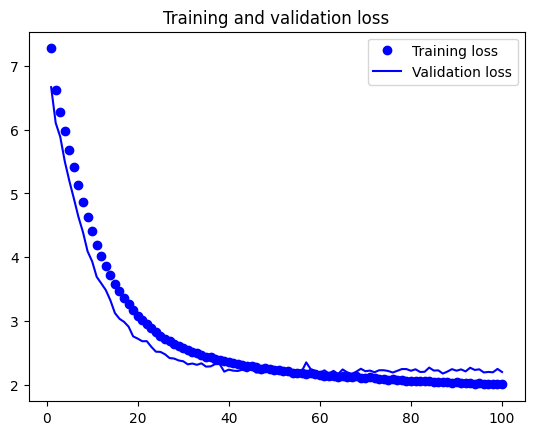

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.81897   0.95000   0.87963       100
          dolphin    0.83673   0.82000   0.82828       100
            otter    0.58333   0.49000   0.53261       100
             seal    0.37391   0.43000   0.40000       100
            whale    0.36134   0.43000   0.39269       100
         aquarium    0.60674   0.54000   0.57143       100
             fish    0.70707   0.70000   0.70352       100
              ray    0.75000   0.66000   0.70213       100
            shark    0.79381   0.77000   0.78173       100
            trout    0.75926   0.82000   0.78846       100
          orchids    0.56627   0.47000   0.51366       100
          poppies    0.44898   0.44000   0.44444       100
            roses    0.75000   0.72000   0.73469       100
       sunflowers    0.67742   0.63000   0.65285       100
           tulips    0.58252   0.60000   0.59113     

In [ ]:
def CNN3():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

CNN3 = build_modified_cnn2()

optimizer = Adam(learning_rate=0.0001)
CNN3.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


CNN3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = CNN3.fit(datagen.flow(X_train, y_train, batch_size=50),
                                    steps_per_epoch=X_train.shape[0] // 50,
                                    epochs=100,
                                    validation_data=(X_validation, y_validation),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(CNN3)
        scores = CNN3.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {CNN3.metrics_names[1]} of {scores[1]*100}')
        return CNN3

CNN3 = gpu()

test_loss, test_acc = CNN3.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_103 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 conv2d_104 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_81 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_81 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_105 (Conv2D)         (None, 16, 16, 128)      

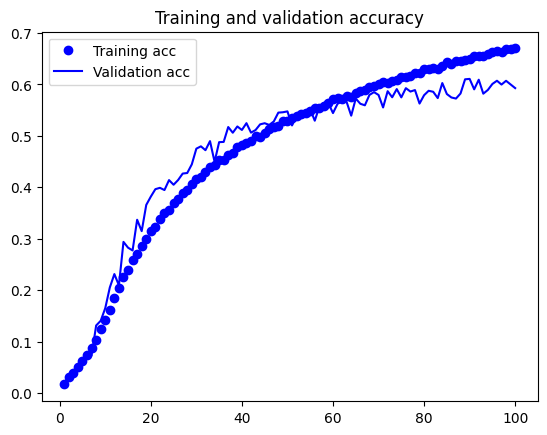

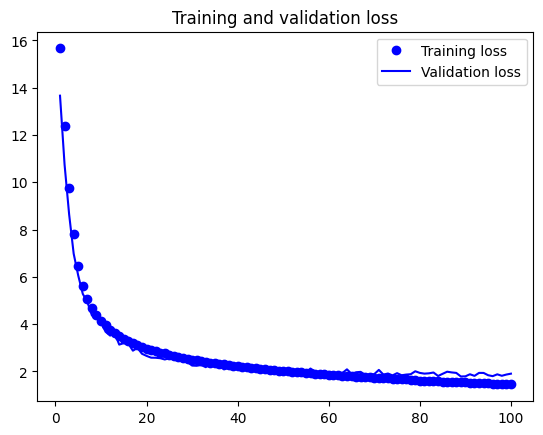

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.80180   0.89000   0.84360       100
          dolphin    0.75758   0.75000   0.75377       100
            otter    0.64615   0.42000   0.50909       100
             seal    0.44643   0.25000   0.32051       100
            whale    0.29600   0.37000   0.32889       100
         aquarium    0.64706   0.77000   0.70320       100
             fish    0.71264   0.62000   0.66310       100
              ray    0.61321   0.65000   0.63107       100
            shark    0.60769   0.79000   0.68696       100
            trout    0.82759   0.72000   0.77005       100
          orchids    0.52564   0.41000   0.46067       100
          poppies    0.50000   0.34000   0.40476       100
            roses    0.81609   0.71000   0.75936       100
       sunflowers    0.61386   0.62000   0.61692       100
           tulips    0.53000   0.53000   0.53000     

In [ ]:
def VGG3():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu', kernel_regularizer='l2'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer='l2'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(100, activation='softmax')
    ])
    return model

VGG3 = VGG3()

VGG3.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

VGG3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = VGG3.fit(datagen.flow(X_train, y_train, batch_size=50),
                                    steps_per_epoch=X_train.shape[0] // 50,
                                    epochs=100,
                                    validation_data=(X_validation, y_validation),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(VGG3)
        scores = VGG3.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {VGG3.metrics_names[1]} of {scores[1]*100}')
        return VGG3

VGG3 = gpu()

test_loss, test_acc = VGG3.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 16, 16, 64)        1792      
                                                                 
 batch_normalization_87 (Ba  (None, 16, 16, 64)        256       
 tchNormalization)                                               
                                                                 
 activation (Activation)     (None, 16, 16, 64)        0         
                                                                 
 depthwise_conv2d (Depthwis  (None, 16, 16, 64)        640       
 eConv2D)                                                        
                                                                 
 batch_normalization_88 (Ba  (None, 16, 16, 64)        256       
 tchNormalization)                                               
                                                     

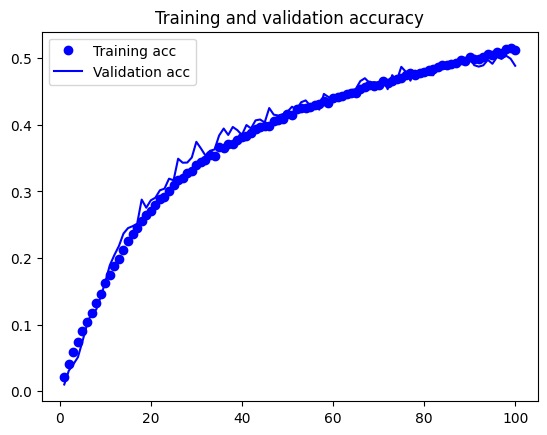

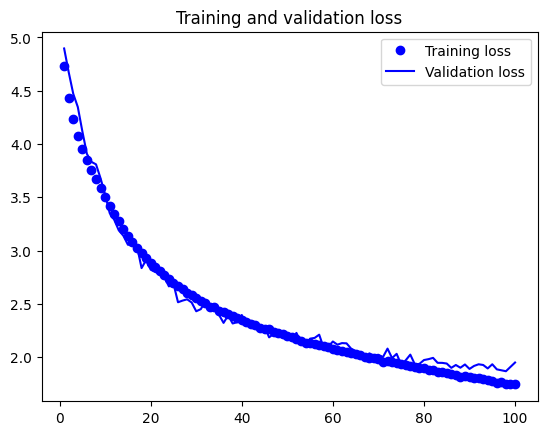

313/313 [==============================] - 1s 3ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.80851   0.76000   0.78351       100
          dolphin    0.56250   0.54000   0.55102       100
            otter    0.44828   0.39000   0.41711       100
             seal    0.62069   0.18000   0.27907       100
            whale    0.21698   0.23000   0.22330       100
         aquarium    0.46237   0.43000   0.44560       100
             fish    0.60976   0.50000   0.54945       100
              ray    0.47015   0.63000   0.53846       100
            shark    0.28788   0.76000   0.41758       100
            trout    0.70667   0.53000   0.60571       100
          orchids    0.56757   0.21000   0.30657       100
          poppies    0.54839   0.17000   0.25954       100
            roses    0.49275   0.68000   0.57143       100
       sunflowers    0.46667   0.56000   0.50909       100
           tulips    0.46000   0.46000   0.46000     

NameError: name 'X_test' is not defined

In [ ]:
import time
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

def MobileNet3():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(DepthwiseConv2D((3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(1024, (1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(GlobalAveragePooling2D())

    model.add(Dropout(0.4))

    model.add(Dense(100, activation='softmax'))

    return model


MobileNet3 = MobileNet3()

MobileNet3.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

MobileNet3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = MobileNet3.fit(datagen.flow(X_train, y_train, batch_size=50),
                                    steps_per_epoch=X_train.shape[0] // 50,
                                    epochs=100,
                                    validation_data=(X_validation, y_validation),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(MobileNet3)
        scores = MobileNet3.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {MobileNet3.metrics_names[1]} of {scores[1]*100}')
        return MobileNet3

MobileNet3 = gpu()

test_loss, test_acc = MobileNet3.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_131 (Conv2D)         (None, 16, 16, 32)        864       
                                                                 
 batch_normalization_100 (B  (None, 16, 16, 32)        128       
 atchNormalization)                                              
                                                                 
 re_lu_69 (ReLU)             (None, 16, 16, 32)        0         
                                                                 
 conv2d_132 (Conv2D)         (None, 16, 16, 144)       4608      
                                                                 
 batch_normalization_101 (B  (None, 16, 16, 144)       576       
 atchNormalization)                                              
                                                                 
 re_lu_70 (ReLU)             (None, 16, 16, 144)      

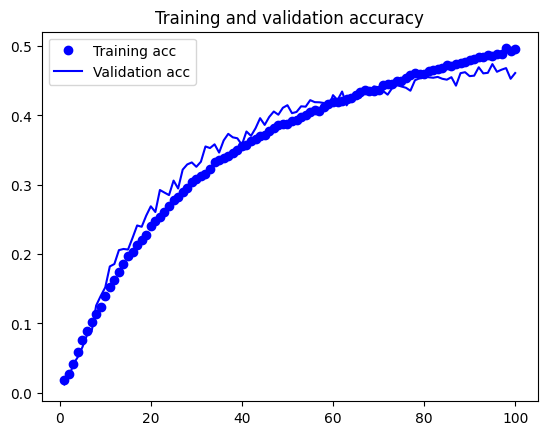

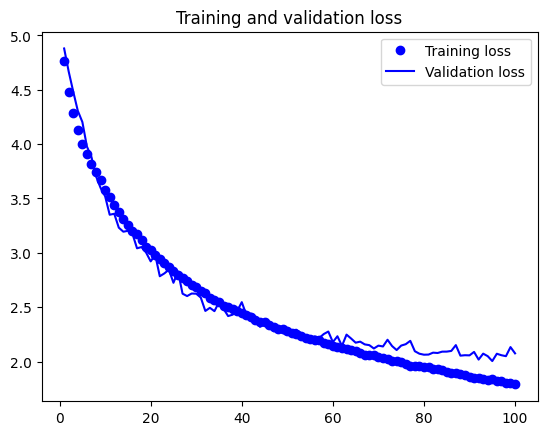

313/313 [==============================] - 2s 5ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.82716   0.67000   0.74033       100
          dolphin    0.58333   0.49000   0.53261       100
            otter    0.53125   0.34000   0.41463       100
             seal    0.41176   0.14000   0.20896       100
            whale    0.17045   0.15000   0.15957       100
         aquarium    0.51724   0.45000   0.48128       100
             fish    0.58586   0.58000   0.58291       100
              ray    0.42177   0.62000   0.50202       100
            shark    0.46309   0.69000   0.55422       100
            trout    0.83333   0.50000   0.62500       100
          orchids    0.39130   0.36000   0.37500       100
          poppies    0.38298   0.18000   0.24490       100
            roses    0.50505   0.50000   0.50251       100
       sunflowers    0.45312   0.29000   0.35366       100
           tulips    0.36508   0.23000   0.28221     

In [ ]:
import math
import time

def round_filters(filters, multiplier):
    divisor = 8
    min_depth = None
    if not multiplier:
        return filters

    filters *= multiplier
    min_depth = divisor
    new_filters = max(min_depth, int(filters + divisor / 2) // divisor * divisor)
    if new_filters < 0.9 * filters:
        new_filters += divisor
    return int(new_filters)

def round_repeats(repeats, multiplier):
    if not multiplier:
        return repeats
    return int(math.ceil(multiplier * repeats))

def MBConvBlock(model, input_filters, output_filters, kernel_size, strides, expand_ratio, se_ratio, id_skip, drop_connect_rate):
    expand_filters = input_filters * expand_ratio
    model.add(layers.Conv2D(expand_filters, kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    if 0 < se_ratio <= 1:
        filters_se = max(1, int(input_filters * se_ratio))
        se = layers.GlobalAveragePooling2D()(model.layers[-1].output)
        se = layers.Reshape((1, 1, expand_filters))(se)
        se = layers.Conv2D(filters_se, kernel_size=1, activation='relu', padding='same')(se)
        se = layers.Conv2D(expand_filters, kernel_size=1, activation='sigmoid', padding='same')(se)
        x = layers.multiply([model.layers[-1].output, se])
    else:
        x = model.layers[-1].output

    model.add(layers.Conv2D(output_filters, kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())

    if id_skip and strides == 1 and input_filters == output_filters:
        if drop_connect_rate:
            model.add(layers.Dropout(drop_connect_rate))
        model.add(layers.add([model.layers[-1].output, model.layers[-7].output]))

def EfficientNet3(width_coefficient=1.0, depth_coefficient=1.0, dropout_rate=0.2, l2_reg=1e-5):
    model = models.Sequential()

    model.add(layers.Conv2D(round_filters(32, width_coefficient), kernel_size=3, strides=(2, 2), padding='same', use_bias=False, input_shape=(32,32,3)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    num_blocks = 9
    strides = [1, 2, 2, 2, 1, 1, 2, 1]
    kernels = [3, 3, 3, 5, 5, 5, 3, 3]
    filters = [24, 32, 48, 96, 128, 224, 384, 512, 576]
    depth = round_repeats(1, depth_coefficient)
    drop_rate = dropout_rate / num_blocks

    for i in range(num_blocks - 1):
        MBConvBlock(model,
                    input_filters=round_filters(filters[i], width_coefficient),
                    output_filters=round_filters(filters[i + 1], width_coefficient),
                    kernel_size=kernels[i],
                    strides=strides[i],
                    expand_ratio=6,
                    se_ratio=0.25,
                    id_skip=True,
                    drop_connect_rate=drop_rate)

        model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(round_filters(1280, width_coefficient), kernel_size=1, padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(100, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg)))

    return model

EfficientNet3 = EfficientNet3()

EfficientNet3.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

EfficientNet3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)


import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = EfficientNet3.fit(datagen.flow(X_train, y_train, batch_size=50),
                                    steps_per_epoch=X_train.shape[0] // 50,
                                    epochs=100,
                                    validation_data=(X_validation, y_validation),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(EfficientNet3)
        scores = EfficientNet3.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {EfficientNet3.metrics_names[1]} of {scores[1]*100}')
        return EfficientNet3

EfficientNet3 = gpu()

test_loss, test_acc = EfficientNet3.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_234 (Conv2D)         (None, 32, 32, 64)           1792      ['input_10[0][0]']            
                                                                                                  
 batch_normalization_241 (B  (None, 32, 32, 64)           256       ['conv2d_234[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 conv2d_235 (Conv2D)         (None, 32, 32, 64)           36928     ['batch_normalization_24

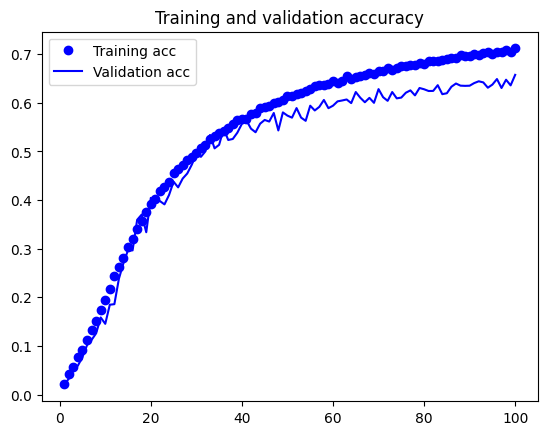

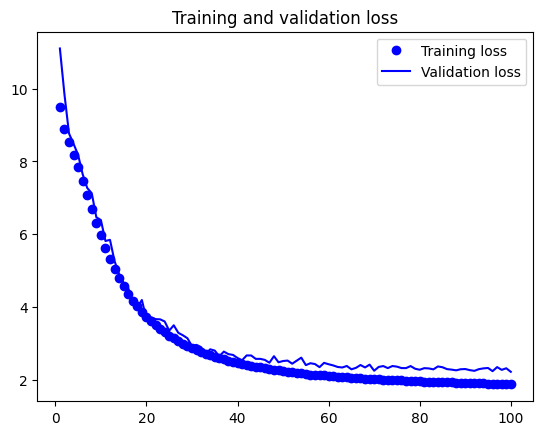

313/313 [==============================] - 2s 5ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.92391   0.85000   0.88542       100
          dolphin    0.81111   0.73000   0.76842       100
            otter    0.46763   0.65000   0.54393       100
             seal    0.50000   0.39000   0.43820       100
            whale    0.44118   0.45000   0.44554       100
         aquarium    0.79747   0.63000   0.70391       100
             fish    0.66667   0.72000   0.69231       100
              ray    0.59615   0.62000   0.60784       100
            shark    0.72269   0.86000   0.78539       100
            trout    0.83529   0.71000   0.76757       100
          orchids    0.52128   0.49000   0.50515       100
          poppies    0.53333   0.40000   0.45714       100
            roses    0.74528   0.79000   0.76699       100
       sunflowers    0.53175   0.67000   0.59292       100
           tulips    0.66667   0.58000   0.62032     

In [ ]:
def ResNet3():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(6):
        residual = x
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(4):
        residual = x
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(3):
        residual = x
        x = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(256, (3, 3), activation='relu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

ResNet3 = ResNet3()


ResNet3.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy'])

ResNet3.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = ResNet3.fit(datagen.flow(X_train, y_train, batch_size=50),
                                    steps_per_epoch=X_train.shape[0] // 50,
                                    epochs=100,
                                    validation_data=(X_validation, y_validation),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(ResNet3)
        scores = ResNet3.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {ResNet3.metrics_names[1]} of {scores[1]*100}')
        return ResNet3

ResNet3 = gpu()

test_loss, test_acc = ResNet3.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_128 (Conv2D)         (None, 32, 32, 64)           1792      ['input_5[0][0]']             
                                                                                                  
 batch_normalization_132 (B  (None, 32, 32, 64)           256       ['conv2d_128[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 conv2d_129 (Conv2D)         (None, 32, 32, 64)           36928     ['batch_normalization_13

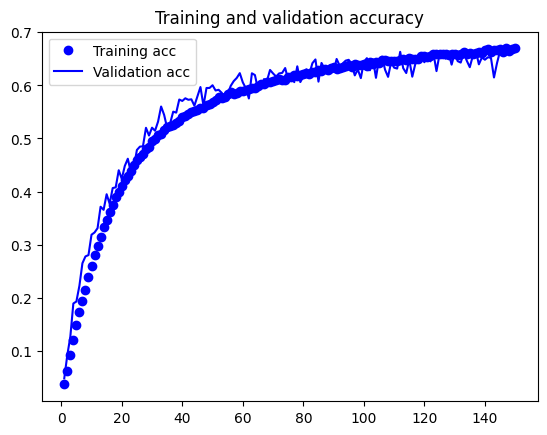

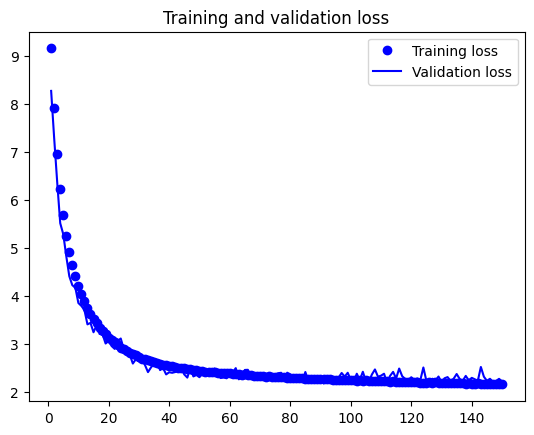

313/313 [==============================] - 2s 5ms/step
10000
                   precision    recall  f1-score   support

           beaver    0.81905   0.86000   0.83902       100
          dolphin    0.79412   0.81000   0.80198       100
            otter    0.63855   0.53000   0.57923       100
             seal    0.55814   0.24000   0.33566       100
            whale    0.26667   0.64000   0.37647       100
         aquarium    0.78313   0.65000   0.71038       100
             fish    0.65138   0.71000   0.67943       100
              ray    0.59055   0.75000   0.66079       100
            shark    0.69841   0.88000   0.77876       100
            trout    0.88636   0.78000   0.82979       100
          orchids    0.51807   0.43000   0.46995       100
          poppies    0.60606   0.40000   0.48193       100
            roses    0.73077   0.76000   0.74510       100
       sunflowers    0.64815   0.70000   0.67308       100
           tulips    0.71429   0.60000   0.65217     

In [ ]:
def Final_ResNet():
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(64, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(6):
        residual = x
        x = layers.Conv2D(64, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(64, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.Conv2D(128, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(4):
        residual = x
        x = layers.Conv2D(128, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(128, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.Conv2D(256, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.5)(x)

    for _ in range(3):
        residual = x
        x = layers.Conv2D(256, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Conv2D(256, (3, 3), activation='elu', padding='same',kernel_regularizer=regularizers.l2(0.001))(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.5)(x)
        x = layers.add([x, residual])

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='elu', kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

Final_ResNet = Final_ResNet()


Final_ResNet.compile(loss=categorical_crossentropy, optimizer=RMSprop(learning_rate = 0.0001), metrics=['accuracy'])

Final_ResNet.summary()

datagen = ImageDataGenerator(
            featurewise_center=False,
            samplewise_center=False,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            rotation_range=0,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            vertical_flip=False)

datagen.fit(X_train)

import time

def gpu():
    with tf.device('/device:GPU:0'):

        training_start = time.time()
        history = Final_ResNet.fit(datagen.flow(X_train, y_train, batch_size=32),
                                    steps_per_epoch=X_train.shape[0] // 32,
                                    epochs=150,
                                    validation_data=(X_validation, y_validation),
                                    verbose=1)

        training_stop = time.time()
        training_time = training_stop - training_start
        print(f"Training time: {training_time}")
        training_plot(history)
        evaluation(Final_ResNet)
        scores = Final_ResNet.evaluate(test_images, test_labels)
        print(f'accuracy on test set: {Final_ResNet.metrics_names[1]} of {scores[1]*100}')
        return Final_ResNet

Final_ResNet = gpu()

test_loss, test_acc = Final_ResNet.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

1/1 [==============================] - 0s 23ms/step


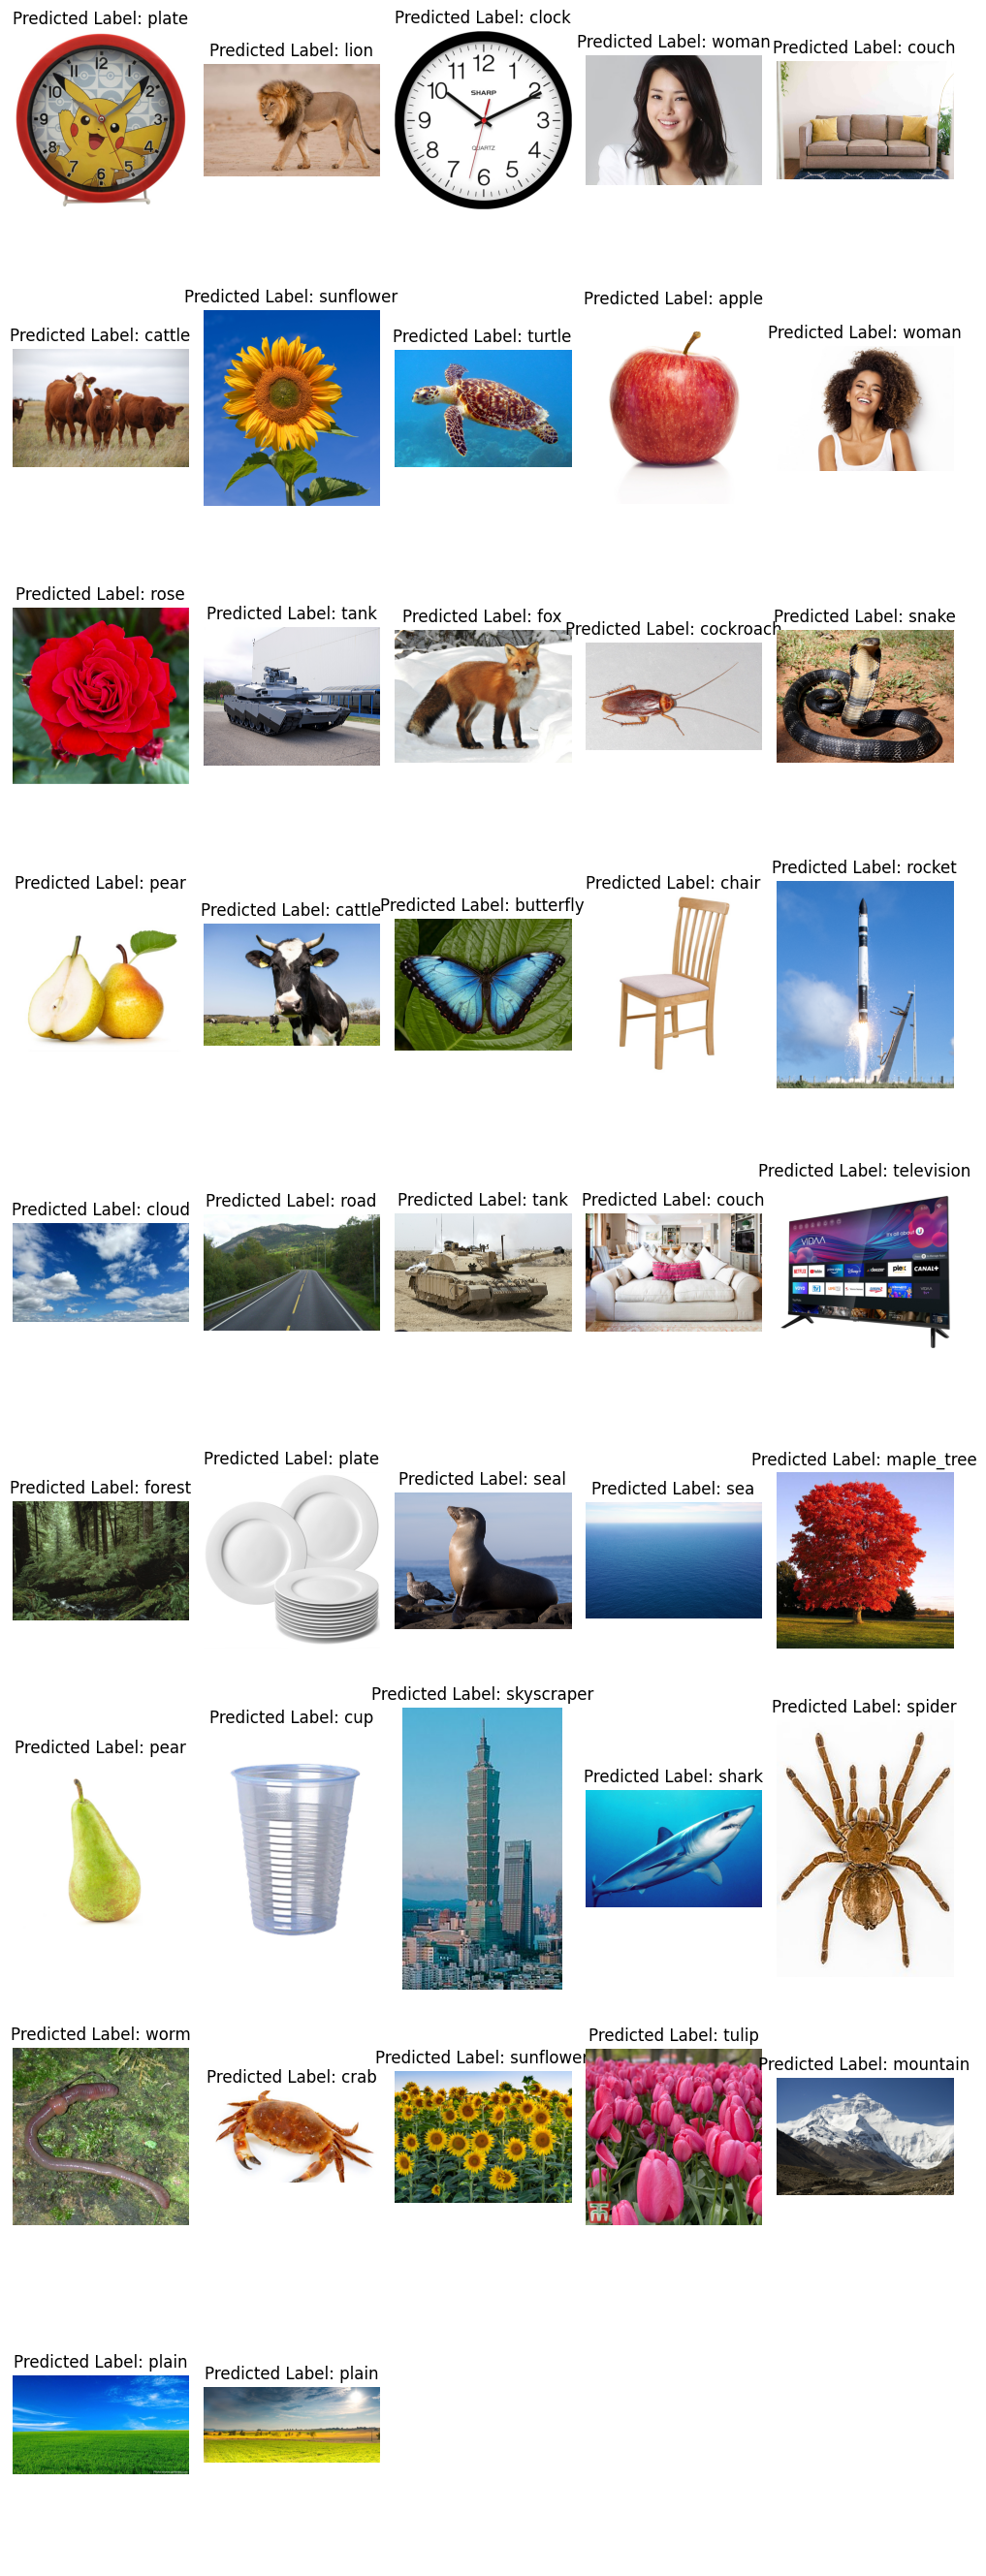

In [ ]:
cifar100_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck',
    'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
    'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television',
    'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

import os
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
from PIL import Image

def predict_label(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.
    predictions = Final_ResNet.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_label = cifar100_labels[predicted_class_index]
    return predicted_label

folder_path = 'Images/'

image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

num_images = len(image_files)
num_cols = 5
num_rows = (num_images // num_cols) + (1 if num_images % num_cols != 0 else 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

for i, img_file in enumerate(image_files):
    img_path = os.path.join(folder_path, img_file)
    predicted_label = predict_label(img_path)
    label_folder = os.path.join("/content/Labelled-Images", predicted_label)
    os.makedirs(label_folder, exist_ok=True)


    new_img_path = os.path.join(label_folder, img_file)
    Image.open(img_path).save(new_img_path)

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    ax.imshow(image.load_img(img_path))
    ax.set_title(f"Predicted Label: {predicted_label}")
    ax.set_xlabel(f"Image Filename: {img_file}")
    ax.axis('off')

for i in range(num_images, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()